# Assignment 1: From Dirty Data to Predictive Models

Federico Giorgi (fg2617)

Titanic Survival Dataset

## Dataset Description

**Data Dictionary**

| Variable  | Definition                          | Key                                  |
|-----------|-------------------------------------|--------------------------------------|
| survival  | Survival                            | 0 = No, 1 = Yes                      |
| pclass    | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd            |
| sex       | Sex                                 |                                      |
| age       | Age in years                        |                                      |
| sibsp     | # of siblings / spouses aboard      |                                      |
| parch     | # of parents / children aboard      |                                      |
| ticket    | Ticket number                       |                                      |
| fare      | Passenger fare                      |                                      |
| cabin     | Cabin number                        |                                      |
| embarked  | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |


**Variable Notes**
pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Basics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.metrics import accuracy_score, classification_report, make_scorer, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold, KFold, learning_curve, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.calibration import calibration_curve
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB


In [5]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

## 1 Exploratory data analysis and visualization

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.1 Univariate Data Analysis

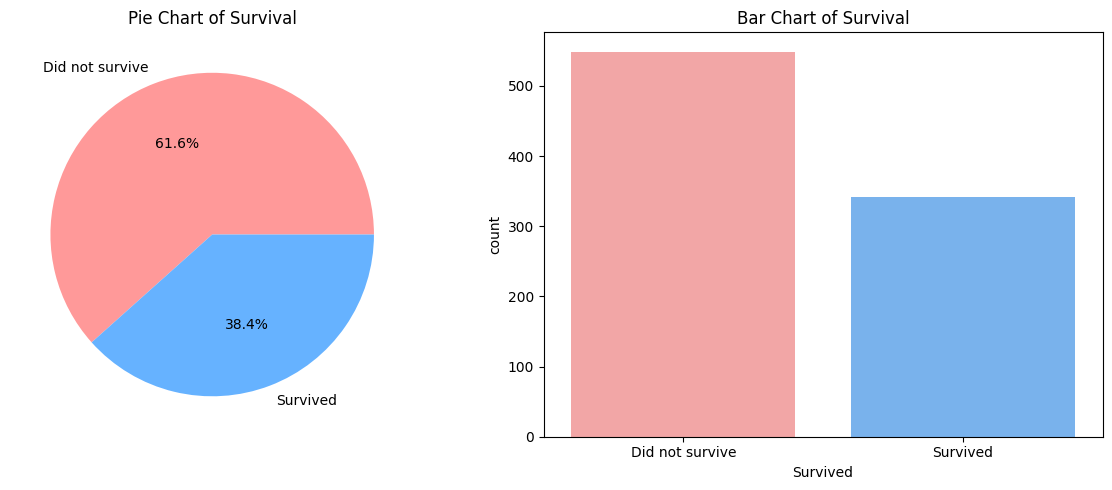

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
df_train["Survived"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    labels=["Did not survive", "Survived"],
    colors=["#FF9999", "#66B2FF"],
    ax=axes[0]
)
axes[0].set_ylabel("")
axes[0].set_title("Pie Chart of Survival")

# Bar chart
sns.countplot(x="Survived", data=df_train, palette=["#FF9999", "#66B2FF"], ax=axes[1])
axes[1].set_xticklabels(["Did not survive", "Survived"])
axes[1].set_title("Bar Chart of Survival")

plt.tight_layout()
plt.show()

Both plots highlight a strong class imbalance in the dataset: most passengers did not survive, while survivors represent a much smaller portion.

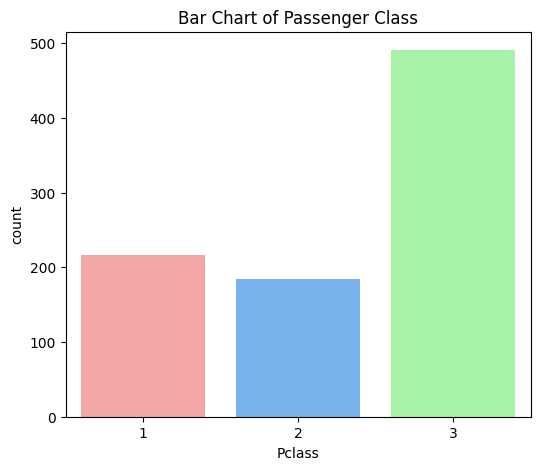

In [55]:
plt.figure(figsize=(6, 5))
sns.countplot(x="Pclass", data=df_train, palette=["#FF9999", "#66B2FF", "#99FF99"])
plt.title("Bar Chart of Passenger Class")
plt.show()

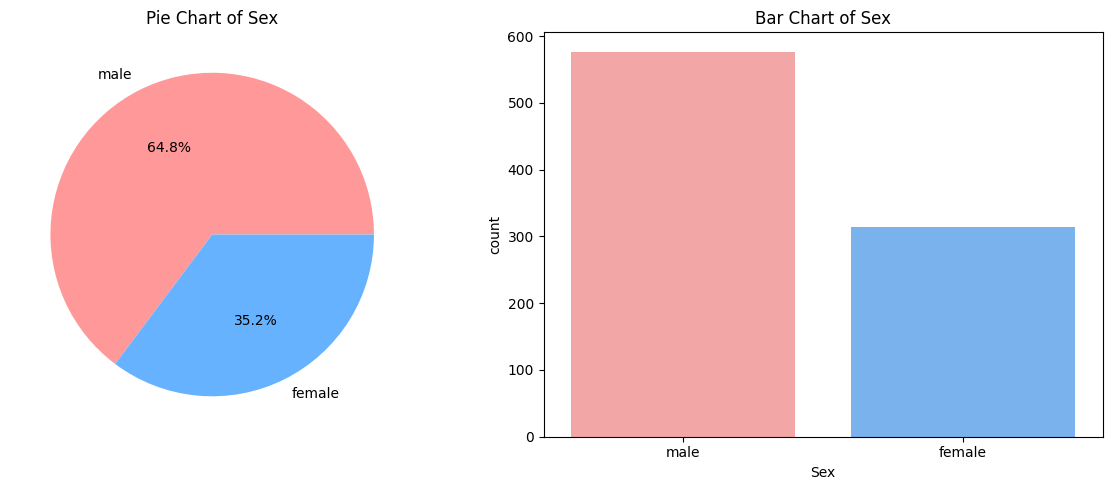

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_train["Sex"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["#FF9999", "#66B2FF"],
    ax=axes[0]
)
axes[0].set_ylabel("")
axes[0].set_title("Pie Chart of Sex")

sns.countplot(x="Sex", data=df_train, palette=["#FF9999", "#66B2FF"], ax=axes[1])
axes[1].set_title("Bar Chart of Sex")

plt.tight_layout()
plt.show()

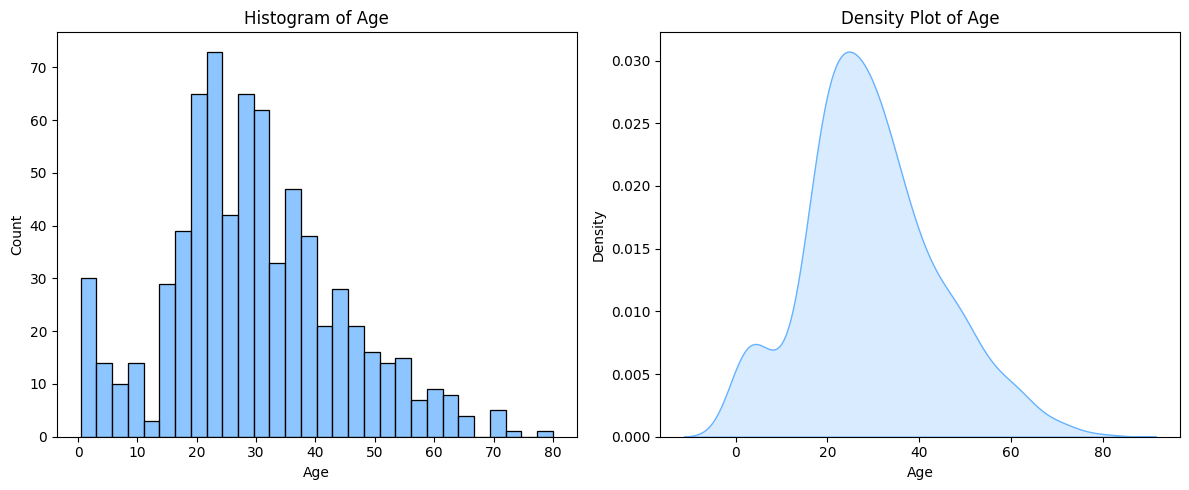

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_train["Age"].dropna(), bins=30, kde=False, color="#66B2FF", ax=axes[0])
axes[0].set_title("Histogram of Age")

sns.kdeplot(df_train["Age"].dropna(), fill=True, color="#66B2FF", ax=axes[1])
axes[1].set_title("Density Plot of Age")

plt.tight_layout()
plt.show()

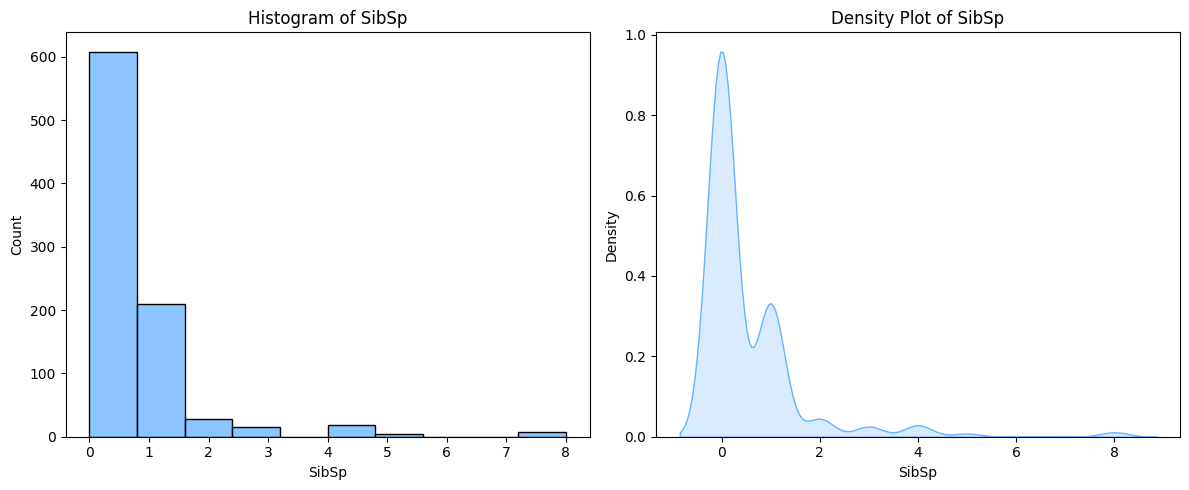

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_train["SibSp"], bins=10, kde=False, color="#66B2FF", ax=axes[0])
axes[0].set_title("Histogram of SibSp")

sns.kdeplot(df_train["SibSp"], fill=True, color="#66B2FF", ax=axes[1])
axes[1].set_title("Density Plot of SibSp")

plt.tight_layout()
plt.show()

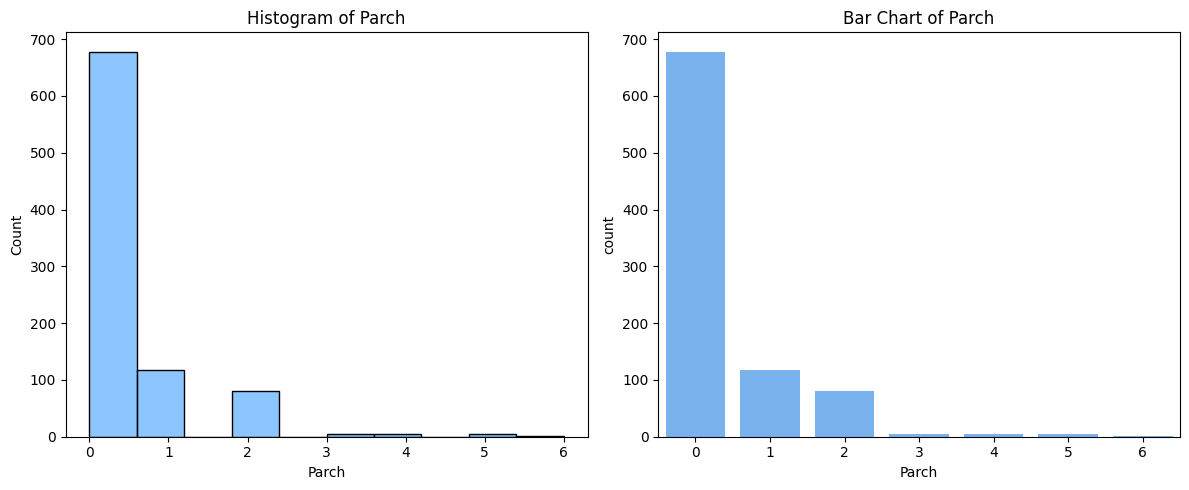

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_train["Parch"], bins=10, kde=False, color="#66B2FF", ax=axes[0])
axes[0].set_title("Histogram of Parch")

sns.countplot(x="Parch", data=df_train, color="#66B2FF", ax=axes[1])
axes[1].set_title("Bar Chart of Parch")

plt.tight_layout()
plt.show()

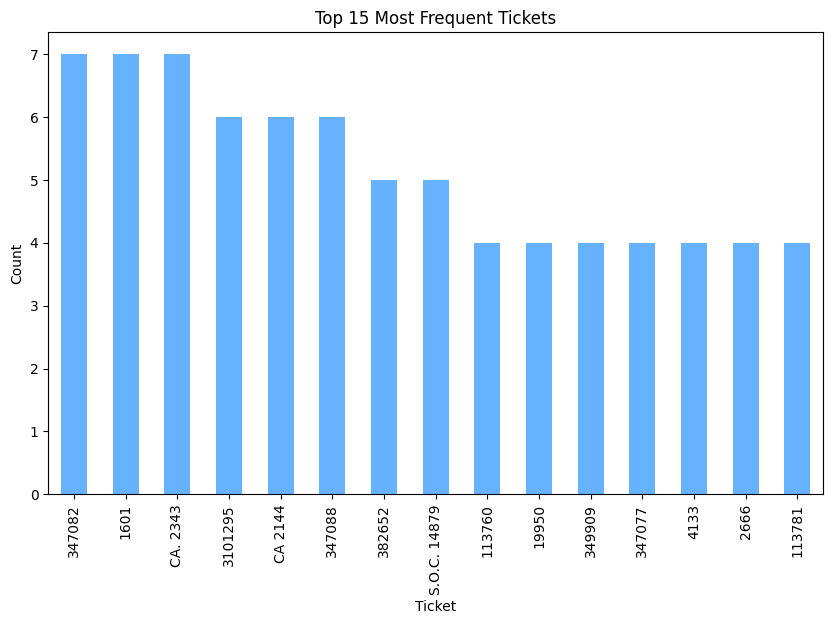

In [64]:
plt.figure(figsize=(10, 6))
df_train["Ticket"].value_counts().head(15).plot(kind="bar", color="#66B2FF")
plt.title("Top 15 Most Frequent Tickets")
plt.xlabel("Ticket")
plt.ylabel("Count")
plt.show()


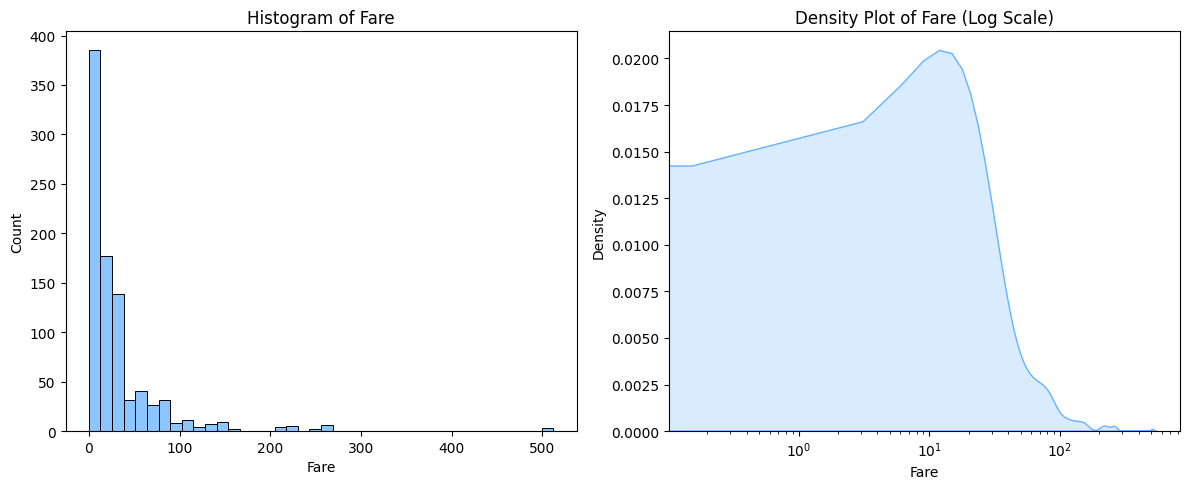

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_train["Fare"], bins=40, kde=False, color="#66B2FF", ax=axes[0])
axes[0].set_title("Histogram of Fare")

sns.kdeplot(df_train["Fare"], fill=True, color="#66B2FF", ax=axes[1])
axes[1].set_xscale("log")
axes[1].set_title("Density Plot of Fare (Log Scale)")

plt.tight_layout()
plt.show()

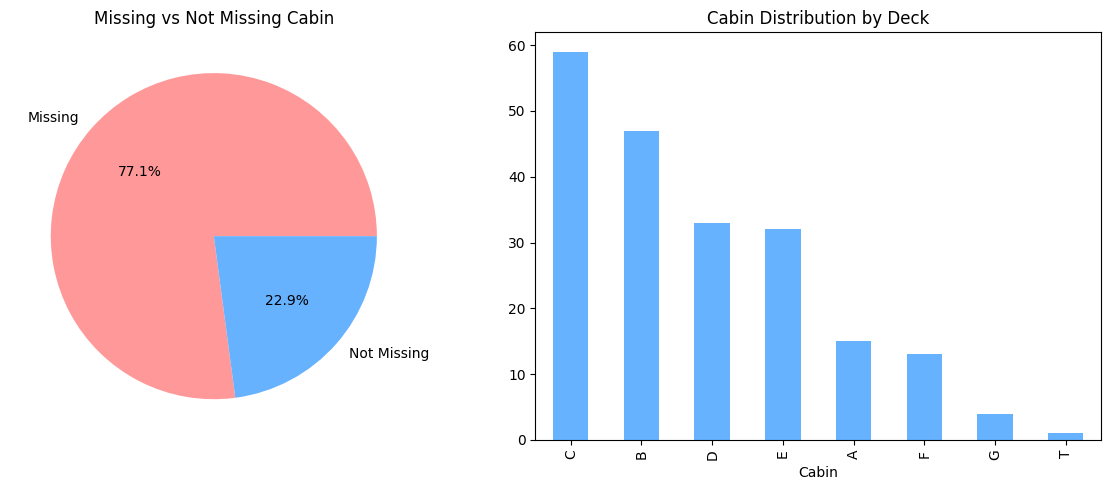

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_train["Cabin"].isnull().value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    labels=["Missing", "Not Missing"],
    colors=["#FF9999", "#66B2FF"],
    ax=axes[0]
)
axes[0].set_ylabel("")
axes[0].set_title("Missing vs Not Missing Cabin")

df_train["Cabin"].dropna().str[0].value_counts().plot(kind="bar", color="#66B2FF", ax=axes[1])
axes[1].set_title("Cabin Distribution by Deck")

plt.tight_layout()
plt.show()

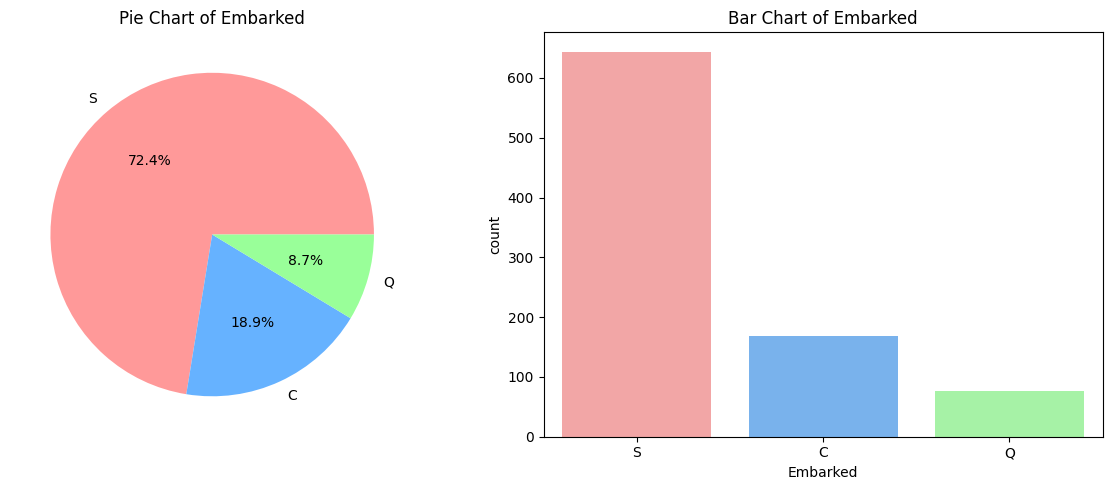

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_train["Embarked"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["#FF9999", "#66B2FF", "#99FF99"],
    ax=axes[0]
)
axes[0].set_ylabel("")
axes[0].set_title("Pie Chart of Embarked")

sns.countplot(x="Embarked", data=df_train, palette=["#FF9999", "#66B2FF", "#99FF99"], ax=axes[1])
axes[1].set_title("Bar Chart of Embarked")

plt.tight_layout()
plt.show()


### 1.2 Multivariate Data Analysis

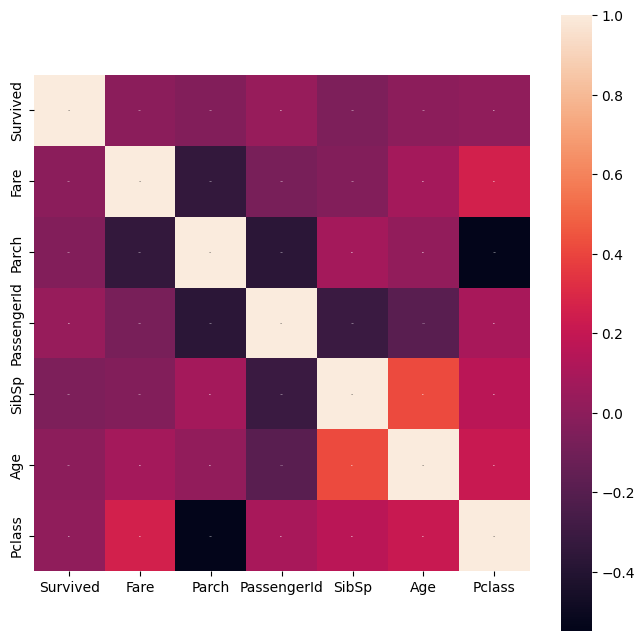

In [15]:
corrmat = df_train.corr(numeric_only=True)
f,ax=plt.subplots(figsize=(8,8))
k=10
cols=corrmat.nlargest(k,'Survived')['Survived'].index
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 1}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

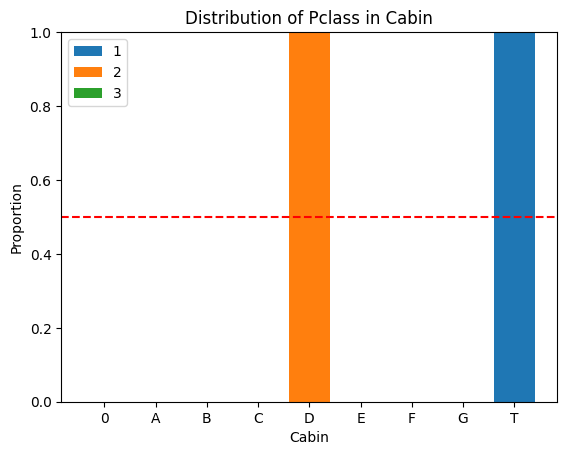

In [16]:
var = "Cabin"
ones = []
twos = []
threes = []
cabin = ["0", "A", "B", "C", "D", "E", "F", "G", "T"]

for i in cabin:
    data = df_train[df_train['Cabin'] == i]

    one = len(data[data["Pclass"] == 1])
    two = len(data[data["Pclass"] == 2])
    three = len(data[data["Pclass"] == 3])
    tot = one + two + three if one + two + three != 0 else 1  # to avoid division by zero
    ones.append(one / tot)
    twos.append(two / tot)
    threes.append(three / tot)

plt.bar(cabin, ones, label='1')
plt.bar(cabin, twos, label='2', bottom=ones)
plt.bar(cabin, threes, label='3', bottom=[i+j for i, j in zip(ones, twos)])
plt.axhline(y=0.5, color='red', linestyle='--')
plt.xlabel('Cabin')
plt.ylabel('Proportion')
plt.title(f'Distribution of Pclass in {var}')
plt.legend()
plt.show()

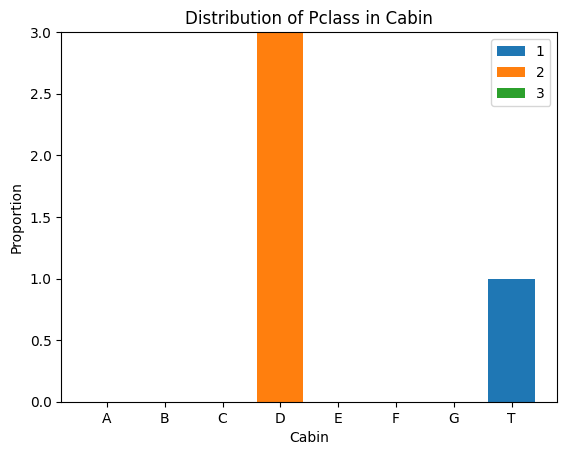

In [17]:
var = "Cabin"
ones = []
twos = []
threes = []
cabin = ["A", "B", "C", "D", "E", "F", "G", "T"]

for i in cabin:
    data = df_train[df_train['Cabin'] == i]

    one = len(data[data["Pclass"] == 1])
    two = len(data[data["Pclass"] == 2])
    three = len(data[data["Pclass"] == 3])
    ones.append(one)
    twos.append(two )
    threes.append(three)

plt.bar(cabin, ones, label='1')
plt.bar(cabin, twos, label='2', bottom=ones)
plt.bar(cabin, threes, label='3', bottom=[i+j for i, j in zip(ones, twos)])
plt.xlabel('Cabin')
plt.ylabel('Proportion')
plt.title(f'Distribution of Pclass in {var}')
plt.legend()
plt.show()

[0, 0, 0, 0, 2, 0, 0, 0, 0]


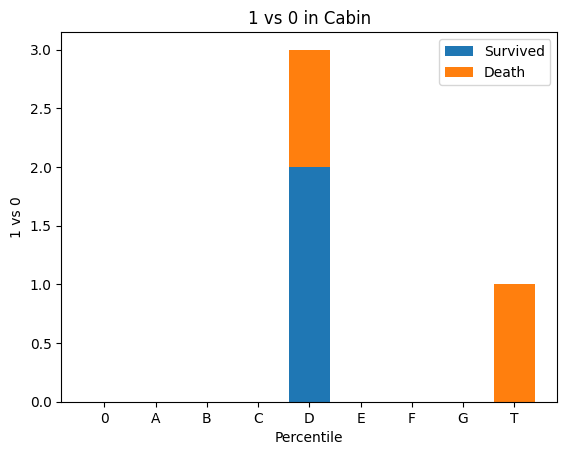

In [18]:
var = "Cabin"
ones = []
zeros = []
cabin = ["0","A","B","C","D","E","F","G","T"]

for i in cabin:
    data = df_train[df_train['Cabin'] == i]


    one = len(data[data["Survived"] == 1])
    zero = len(data[data["Survived"] == 0])
    ones.append(one)
    zeros.append(zero)

print(ones)

plt.bar(cabin, ones, label='Survived')
plt.bar(cabin, zeros, label='Death', bottom=ones)
plt.xlabel('Percentile')
plt.ylabel('1 vs 0')
plt.title(f'1 vs 0 in {var}')
plt.legend()
plt.show()

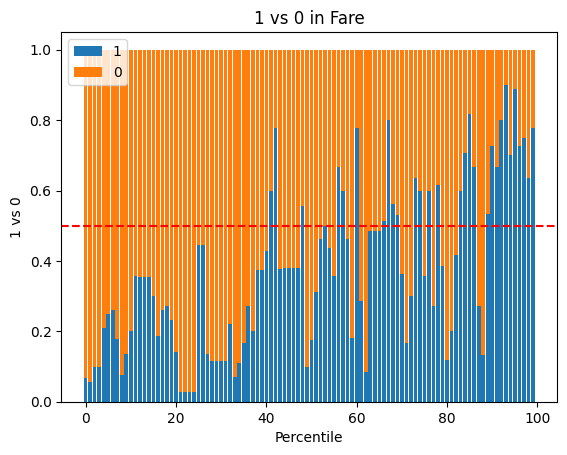

In [19]:
var = "Fare"
values = []
quantiles = []
ones = []
zeros = []

for i in range(0, 100):
    quantiles.append(i)
    quantile_i = df_train[var].quantile(i/100)
    quantile_i_1 = df_train[var].quantile((i+1)/100)
    df_quartile_i = df_train[(quantile_i_1 >= df_train[var]) & (df_train[var] >= quantile_i)]

    one = len(df_quartile_i[df_quartile_i["Survived"] == 1])
    zero = len(df_quartile_i[df_quartile_i["Survived"] == 0])
    tot = one + zero
    ones.append(one/tot)
    zeros.append(zero/tot)

plt.bar(quantiles, ones, label='1')
plt.bar(quantiles, zeros, label='0', bottom=ones)
plt.axhline(y=0.5, color='red', linestyle='--')
plt.xlabel('Percentile')
plt.ylabel('1 vs 0')
plt.title(f'1 vs 0 in {var}')
plt.legend()
plt.show()

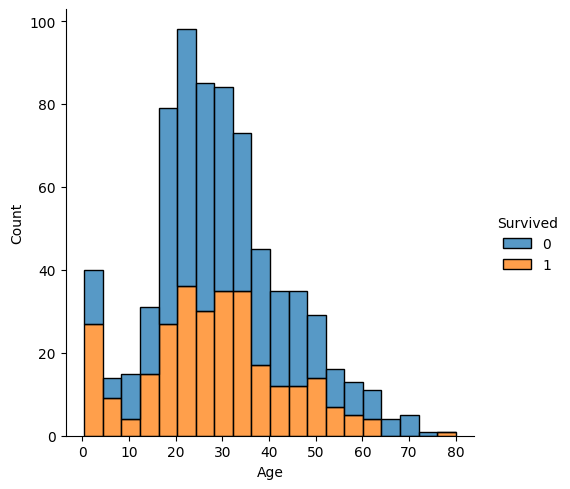

In [20]:
data = pd.concat([df_train['Survived'], df_train['Age']], axis=1)
sns.displot(data=data, x='Age', hue='Survived', multiple="stack")
plt.show()

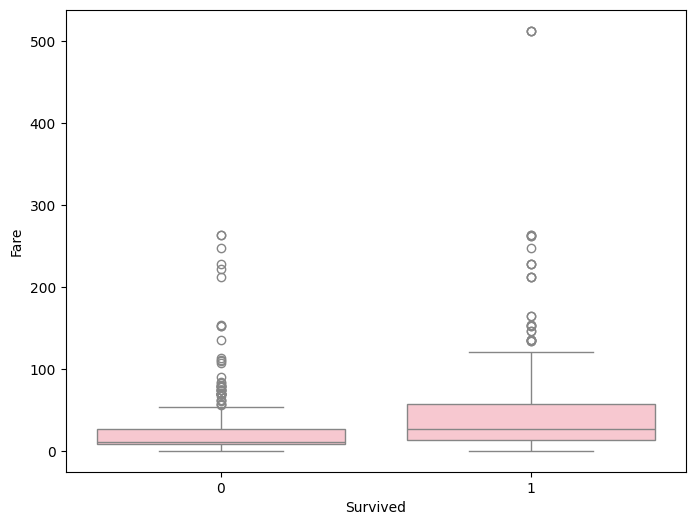

In [21]:
var = "Fare"
data = pd.concat([df_train['Survived'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=var, x="Survived", data=data, color="pink")

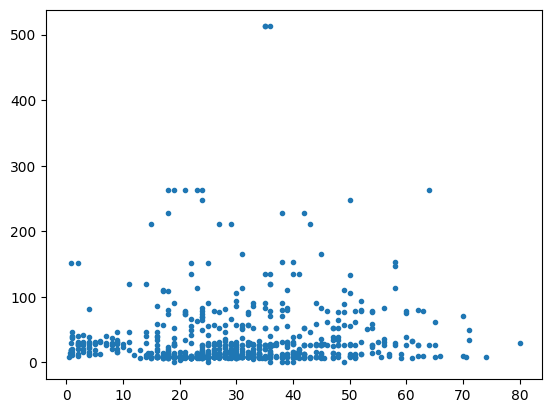

In [22]:
plt.plot(df_train['Age'], df_train['Fare'], '.')
plt.show()

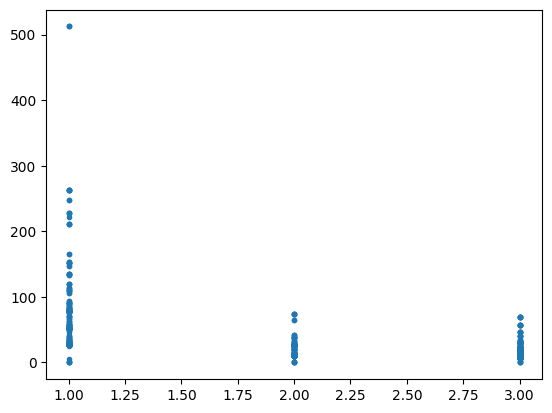

In [23]:
plt.plot(df_train['Pclass'], df_train['Fare'], '.')
plt.show()

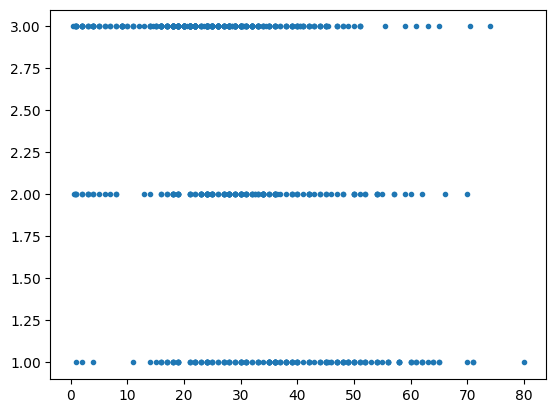

In [24]:
plt.plot(df_train['Age'], df_train['Pclass'], '.')
plt.show()

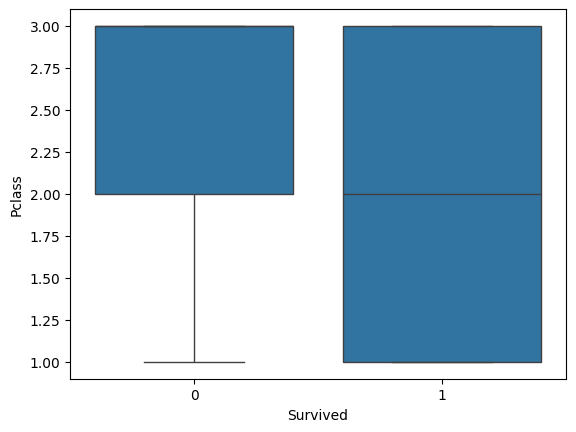

In [25]:
sns.boxplot(y = df_train['Pclass'], x = df_train['Survived'])
plt.show()

In [26]:
fare_scaled_train=StandardScaler().fit_transform(df_train['Fare'].values.reshape(-1,1))
df_train['Fare'] = fare_scaled_train.flatten()

## 2 Data Cleaning

### 2.1 Missing Values

In [27]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / len(df_train)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['# Total', '% Total'])

missing_data.head(10)

,# Total,% Total
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


## 3 Feature Engineering


In [28]:
#Family size
df_train['Family size'] = df_train['SibSp'] + df_train['Parch']

#Is alone
df_train['Is alone'] = 0
for i in range(0, 891):
    if df_train['Family size'][i] == 0:
        df_train['Is alone'][i] = 1

#Sex
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})

#Embarked
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#Cabin
values = []
for i in range (0, 891):
    values.append('0')
    if type(df_train['Cabin'][i]) != float:
        values[i] = df_train['Cabin'][i][0]
df_train['Cabin'] = values
#df_train['Cabin'] = df_train['Cabin'].map({'0': 0,'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8})

#Tile
names = []
for name in range(891):
    title = df_train['Name'][name].split(',')[1].split('.')[0].strip()
    if title not in ('Mr', 'Mrs', 'Miss', 'Master'):
        title = 'Other'
    names.append(title)

df_train['Title'] = names
df_train['Title'] = df_train['Title'].map({'Mr': 0,'Mrs': 1, 'Miss': 2, 'Master': 3, 'Other': 4})

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,Is alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502445,0,2.0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786845,C,0.0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488854,0,2.0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420730,C,2.0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486337,0,2.0,0,1,0


[0.29985443959243085, 0.4666666666666667, 0.7446808510638298, 0.5932203389830508, 0.7575757575757576, 0.75, 0.6153846153846154, 0.5, 0.0]


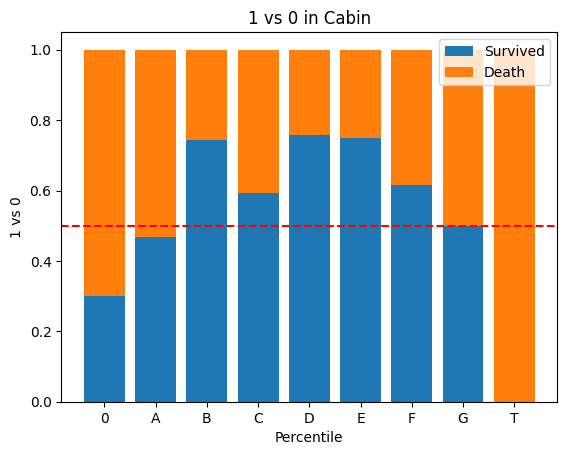

In [29]:
# plot the distribution of different instances of 'SeriousDlqin2yrs' (0 vs 1) through the different percentiles of the variable
var = "Cabin"
ones = []
zeros = []
cabin = ["0","A","B","C","D","E","F","G","T"]

for i in cabin:
    data = df_train[df_train['Cabin'] == i]


    one = len(data[data["Survived"] == 1])
    zero = len(data[data["Survived"] == 0])
    tot = one + zero
    ones.append(one/tot)
    zeros.append(zero/tot)

print(ones)

plt.bar(cabin, ones, label='Survived')
plt.bar(cabin, zeros, label='Death', bottom=ones)
plt.axhline(y=0.5, color='red', linestyle='--')
plt.xlabel('Percentile')
plt.ylabel('1 vs 0')
plt.title(f'1 vs 0 in {var}')
plt.legend()
plt.show()

In [30]:
#Family size
df_test['Family size'] = df_test['SibSp'] + df_test['Parch']

#Is alone
df_test['Is alone'] = 0
for i in range(0, 418):
    if df_test['Family size'][i] == 0:
        df_test['Is alone'][i] = 1

#Sex
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

#Embarked
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#Cabin
values = []
for i in range (0, 418):
    values.append('0')
    if type(df_test['Cabin'][i]) != float:
        values[i] = df_test['Cabin'][i][0]
df_test['Cabin'] = values
df_test['Cabin'] = df_test['Cabin'].map({'0': 0,'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8})

#Tile
names = []
for name in range(0, 418):
    title = df_test['Name'][name].split(',')[1].split('.')[0].strip()
    if title not in ('Mr', 'Mrs', 'Miss', 'Master'):
        title = 'Other'
    names.append(title)

df_test['Title'] = names
df_test['Title'] = df_test['Title'].map({'Mr': 0,'Mrs': 1, 'Miss': 2, 'Master': 3, 'Other': 4})


df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

fare_scaled_test=StandardScaler().fit_transform(df_test['Fare'].values.reshape(-1,1))
df_test['Fare'] = fare_scaled_test.flatten()


df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,Is alone,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,-0.497413,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,-0.512278,0,2,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,-0.464100,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,-0.482475,0,2,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,-0.417492,0,2,2,0,1


## 4 Model training

In [31]:
df_train['Cabin'] = df_train['Cabin'].map({'0': 0,'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8})
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].median(), inplace=True)

In [32]:
#DIVIDING FEATURES FROM TARGET VARIABLE
X = df_train.drop(columns=["PassengerId",'Name', 'Ticket', 'Survived'])
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_pred = df_test.drop(columns=["PassengerId",'Name', 'Ticket'])

df_results = pd.DataFrame(columns=['Model', 'f1', 'precision', 'recall', 'accuracy'])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [33]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family size,Is alone,Title
0,3,0,22.0,1,0,-0.502445,0,2.0,1,0,0
1,1,1,38.0,1,0,0.786845,3,0.0,1,0,1
2,3,1,26.0,0,0,-0.488854,0,2.0,0,1,2
3,1,1,35.0,1,0,0.420730,3,2.0,1,0,1
4,3,0,35.0,0,0,-0.486337,0,2.0,0,1,0


### 4.1 Linear Regression

In [34]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [35]:
y_pred = np.round(y_pred)
y_pred

array([ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
       -0.,  1., -0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  1., -0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.])

#### 4.1.1 LASSO Regression (L1 regularization)

#### 4.1.2 Ridge Regression (L2 regularization)

### 4.2 Naive Bayes

## 5 Model Evaluation

In [36]:
df_results.sort_values(by='f1', ascending=False)

,Model,f1,precision,recall,accuracy


In [37]:
df_results.set_index('Model', inplace=True)
ax = df_results.plot(kind='bar', figsize=(10, 6))

plt.title('Performance dei Modelli')
plt.xlabel('Modelli')
plt.ylabel('Punteggio')
plt.legend(title='Metriche')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

In [ ]:
predictions_df = pd.DataFrame(predictions_xgb, columns=['Survived'])
predictions_df['PassengerId'] = df_test['PassengerId']
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
predictions_df